In [2]:
% matplotlib inline
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.io
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler

import winsound
from datetime import datetime

In [3]:
data = scipy.io.loadmat('data/ex5data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [4]:
def add_bias_unit(df, how='column'):
    """Add bias unit (column or row of 1s) to array at index 0"""
    if how == 'column':
        x_new = np.ones((df.shape[0], df.shape[1] + 1))
        x_new[:, 1:] = df
    elif how == 'row':
        x_new = np.ones((df.shape[0] + 1, df.shape[1]))
        x_new[1:, :] = df
    else:
        raise AttributeError('`how` must be `column` or `row`')
    return pd.DataFrame(x_new)
columns = ['ones', 'x']

#train set
Xtrain = pd.DataFrame(data['X'], columns=['x'])
ytrain = pd.DataFrame(data['y'])

#test set
Xtest = pd.DataFrame(data['Xtest'], columns=['x'])
ytest = pd.DataFrame(data['ytest'])

#cross-validation set
Xval = pd.DataFrame(data['Xval'], columns=['x'])
yval = pd.DataFrame(data['yval'])

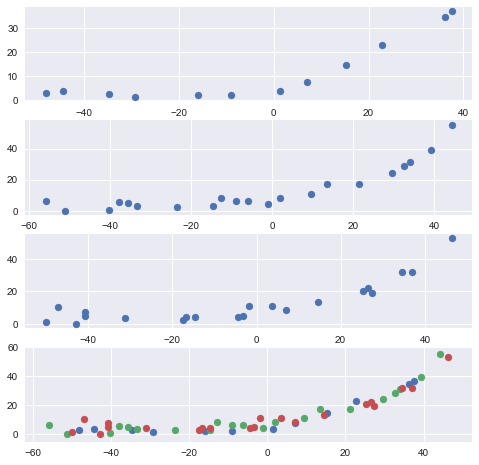

In [5]:
fig, axes = plt.subplots(nrows=4, figsize=[8,8])

axes[0].scatter(Xtrain, ytrain)
axes[1].scatter(Xtest, ytest)
axes[2].scatter(Xval, yval)

axes[3].scatter(Xtrain, ytrain)
axes[3].scatter(Xtest, ytest)
axes[3].scatter(Xval, yval)

In [6]:
class Linear_reg(object):
    def __init__(self, X, y, lam):
        self.X = X
        self.y = y
        self.lam = lam
        self.m = X.shape[0]
        
    def _reshape_theta(self, theta):
        try:
            theta.shape[1] == 1
        except IndexError:
            theta = theta.reshape([-1,1])
        return theta
       
    def calculate_cost(self, theta, *therest):
        theta = self._reshape_theta(theta)
        hypothesis = np.dot(self.X, theta)
        cost = hypothesis - self.y
        cost = np.sum(np.power(cost,2)) / (2*self.m)
        cost = np.squeeze(cost)
        reg = self.lam/(2*self.m) * np.sum(np.power(theta[1:],2))
        return (cost + reg)
    
    def perform_gradient_descent(self, theta):
        theta = self._reshape_theta(theta)
        h = np.dot(self.X, theta)
        err_vector = h - self.y
        a = np.dot(self.X.T, err_vector)
        gradient = np.sum(a, axis=1) / self.m
        regularization = (self.lam/self.m * theta[1:])
        gradient[1:] = gradient[1:] + regularization.T
        return gradient

In [7]:
#--- Testing Part ---

EXPECTED_COST_WITHOUT_REG = 1.3533
EXPECTED_COST_WITH_REG = 1.6917

EXPECTED_NO_REG_GRAD = np.array([-1.4, -8.7333, -4.3333, -7.9333])
EXPECTED_REG_GRAD = np.array([-1.4, -8.26666667, -3.6333, -7.])

arr = [[1, 8, 1, 6],[1, 3, 5, 7],[1, 4, 9, 2]]
testing_X = np.array(arr)
testing_y = np.array([7, 6, 5]).reshape([-1,1])
testing_theta = np.array([.1,.2,.3,.4]).reshape([-1,1])

#--- Test without regression ---
lam = 0

lr = Linear_reg(testing_X, testing_y, lam)
cst = lr.calculate_cost(testing_theta)
gr = lr.perform_gradient_descent(testing_theta)
np.testing.assert_almost_equal(cst, EXPECTED_COST_WITHOUT_REG, decimal=4)
is_close = np.isclose(gr, EXPECTED_NO_REG_GRAD, rtol=1e-4)
print(f'Test of cost WITHOUT regression is as expected: {np.alltrue(is_close)}\nvalues fit:{is_close}')
print(f'Calculated values: {gr},\nExpected: {EXPECTED_NO_REG_GRAD}')

#--- Test with regression ---
print()
lam = 7

lr = Linear_reg(testing_X, testing_y, lam)
cst = lr.calculate_cost(testing_theta)
gr = lr.perform_gradient_descent(testing_theta)

np.testing.assert_almost_equal(cst, EXPECTED_COST_WITH_REG, decimal=4)
print('Are grad WITH regression as expected?')
is_close = np.isclose(gr, EXPECTED_REG_GRAD, rtol=1e-4)
print(f'Test of cost WITHOUT regression is as expected: {np.alltrue(is_close)}\nvalues fit:{is_close}')
print(f'Calculated values: {gr},\nExpected: {EXPECTED_REG_GRAD}')

#--- Testing Part ---

Test of cost WITHOUT regression is as expected: True
values fit:[ True  True  True  True]
Calculated values: [-1.4        -8.73333333 -4.33333333 -7.93333333],
Expected: [-1.4    -8.7333 -4.3333 -7.9333]

Are grad WITH regression as expected?
Test of cost WITHOUT regression is as expected: True
values fit:[ True  True  True  True]
Calculated values: [-1.4        -8.26666667 -3.63333333 -7.        ],
Expected: [-1.4        -8.26666667 -3.6333     -7.        ]


In [8]:
#--- Example cost part ---
print()
COST_WITH_REG = 303.993
EXPECTED_REG_EXAMPLE_GRAD = np.array([-15.30, 598.250])

theta = np.array([1, 1]).reshape([-1,1])
lam = 1
x_ones = add_bias_unit(Xtrain)

lr = Linear_reg(x_ones, ytrain, lam)
cst = lr.calculate_cost(theta)
np.testing.assert_almost_equal(cst, COST_WITH_REG, decimal=3)
gr = lr.perform_gradient_descent(theta)
is_close = np.isclose(gr, EXPECTED_REG_EXAMPLE_GRAD, rtol=1e-3)
print(f'Test of cost WITHOUT regression is as expected: {np.alltrue(is_close)}\nvalues fit:{is_close}')
print(f'Calculated values: {gr},\nExpected: {EXPECTED_REG_EXAMPLE_GRAD}')

#--- Example cost part ---


Test of cost WITHOUT regression is as expected: True
values fit:[ True  True]
Calculated values: [ -15.30301567  598.25074417],
Expected: [ -15.3   598.25]


In [9]:
lam = 0
init_theta = np.array([0, 0]).reshape([-1,1])
x_ones = add_bias_unit(Xtrain)
lr = Linear_reg(x_ones, ytrain, lam)

min_fun = minimize(lr.calculate_cost, init_theta, jac=lr.perform_gradient_descent, options={'maxiter':50, 'disp':True})
min_fun.x

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5


array([ 13.08790351,   0.36777923])

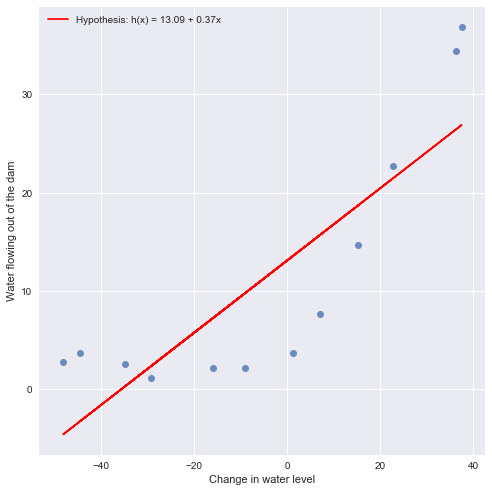

In [10]:
def calculate_hypothesis(X, theta):
    return np.dot(X, theta).reshape([-1,1])

def initialize_hypothesis_df(X, y, theta):
    df = X.copy()
    df.columns = ['ones', 'x']
    df['y'] = y
    df['pred'] = calculate_hypothesis(X, theta)
    return df

def plot_hypothesis(X, theta):
    sns.lmplot(data= X, x='x', y='y', size=7, fit_reg=False)
    label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0], theta[1])
    plt.plot(X.x, X.pred, 'r-',label =label)
    plt.ylabel('Water flowing out of the dam')
    plt.xlabel('Change in water level');
    plt.legend()

theta = min_fun.x
x_ones = add_bias_unit(Xtrain)

hypothesis_df = initialize_hypothesis_df(x_ones, ytrain, theta)
plot_hypothesis(hypothesis_df, theta)

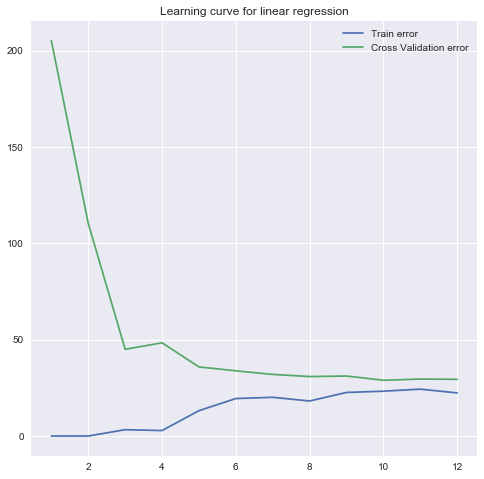

In [11]:
def calculate_error(X, y, theta):
    m = X.shape[0]
    h = calculate_hypothesis(X, theta)
    err = h - y
    return np.sum(np.power(err,2)) / (2*m)

def calculate_learning_curve(Xtrain, ytrain, Xval, yval,split_size, lam):
    m = Xtrain.shape[0]
    init_theta = np.zeros(Xtrain.shape[1]).reshape([-1,1])
    train_errors = []
    val_errors = []
    split_sizes= []
    for s in range(split_size, m+1, split_size):
        split_sizes.append(s)
        x = Xtrain[0:s]
        y = ytrain[0:s]
        
        lr = Linear_reg(x, y, lam)
        min_fun = minimize(lr.calculate_cost, init_theta, jac=lr.perform_gradient_descent, options={'maxiter':50, 'disp':False})

        theta = min_fun.x
        train_errors.append(calculate_error(x, y, theta))
        val_errors.append(calculate_error(Xval, yval, theta))
    return train_errors, val_errors, split_sizes

def plot_learning_curve(train_errors, val_errors, split_sizes):
    fig, axes = plt.subplots(figsize=[8,8])
    plt.plot(split_sizes, train_errors)
    plt.plot(split_sizes, val_errors)
    plt.title('Learning curve for linear regression')
    axes.legend(['Train error', 'Cross Validation error'])
    

lam = 0
split_size = 1


train_errors, val_errors, split_sizes = calculate_learning_curve(add_bias_unit(Xtrain), ytrain,  add_bias_unit(Xval), yval, split_size, lam)
plot_learning_curve(train_errors, val_errors, split_sizes)

Train errors are correct: True
values fit:[ True  True  True  True  True]
Calculated values: [0.0, 0.031250892666115804, 0.013333349148275999, 0.0051652892556984902, 0.002267764635525841],
Expected: [0, 0.03125, 0.013333, 0.005165, 0.002268]

Validation errors are correct: True
values fit:[ True  True  True  True  True]
Calculated values: [0.030000000000000006, 0.0053126585419225516, 0.0006000007477856555, 9.2975206600335713e-05, 2.2677646355258439e-05],
Expected: [0.03, 0.0053125, 0.0006, 9.2975e-05, 2.2676e-05]


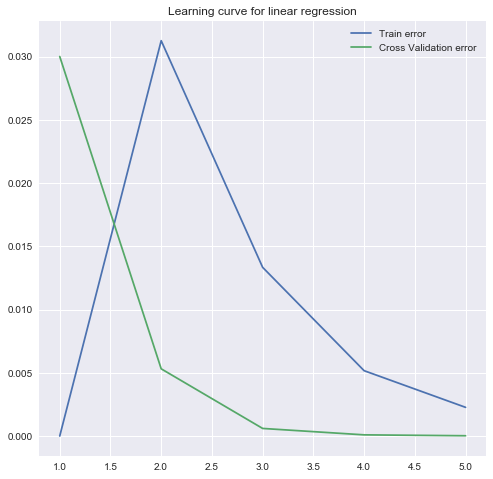

In [12]:
EXPECTED_TRAIN_ERRORS = [0, 0.031250, 0.013333, 0.005165, 0.002268]
EXPECTED_VAL_ERRORS = [3.0000e-002, 5.3125e-003, 6.0000e-004, 9.2975e-005, 2.2676e-005]

X = np.array([[1, -5, 0], [1, -4, 1], [1, -3, 2], [1, -2, 3], [1, -1, 4]])
y = np.array(range(-2,3)).reshape([-1,1])
xv = np.vstack([X/10, X/10])
yv = np.vstack([y/10, y/10])

sdsc = StandardScaler()
lam = 1
split_size = 1

train_errors, val_errors, split_sizes  = calculate_learning_curve(X, y, xv, yv, split_size, lam)
plot_learning_curve(train_errors, val_errors, split_sizes)

is_close = np.isclose(train_errors, EXPECTED_TRAIN_ERRORS, atol=1e-6)
print(f'Train errors are correct: {np.alltrue(is_close)}\nvalues fit:{is_close}')
print(f'Calculated values: {train_errors},\nExpected: {EXPECTED_TRAIN_ERRORS}')
print()

is_close = np.isclose(val_errors, EXPECTED_VAL_ERRORS, atol=1e-6)
print(f'Validation errors are correct: {np.alltrue(is_close)}\nvalues fit:{is_close}')
print(f'Calculated values: {val_errors},\nExpected: {EXPECTED_VAL_ERRORS}')


In [13]:
def get_polynomials(x, poly):
    df = pd.DataFrame()
    for p in range(1, poly+1):
        col = 'x' + str(p)
        df[col] = np.power(x, p)
    return df

get_polynomials([1,2,3], 3)

,x1,x2,x3
0,1,1,1
1,2,4,8
2,3,9,27


In [14]:
def get_polynomials(x, poly):
    df = x.copy()
    for p in range(2, poly+1):
        col = 'x' + str(p)
        df[col] = np.power(x['x'], p)
    return df


class polynomial_regression(object):
    def __init__(self, Xtrain, ytrain, Xval, yval, scaler, polynomial):
        self.scaler = scaler
        self.polynomial = polynomial
        self.ytrain = ytrain
        self.yval = yval
        self.Xtrain = add_bias_unit(pd.DataFrame(self.scaler.fit_transform(get_polynomials(Xtrain, self.polynomial))))
        self.Xval = self.calculate_standarized_value(Xval)
    
    def minimize(self, lam):
        init_theta = np.zeros(self.Xtrain.shape[1]).reshape([-1,1])
        lr = Linear_reg(self.Xtrain, self.ytrain, lam)
        min_fun = minimize(lr.calculate_cost, init_theta, jac=lr.perform_gradient_descent, options={'maxiter':1000, 'disp':False})
        self.theta = min_fun.x
        return self.theta
    
    def calculate_standarized_value(self, x):
        return add_bias_unit(pd.DataFrame(self.scaler.transform(get_polynomials(x, self.polynomial))))
    
    def plot_polynomial_fit(self, fun_x, fun_y, lam, ax):
        ax.scatter(x=self.Xtrain[1], y=self.ytrain, c='r')
        ax.plot(fun_x[1], fun_y)
        
        title = 'Polynomial fit for lam: ' + str(lam)
        ax.set_title(title)
        ax.legend(['Fit function', 'Training data'])
        ax.set_xlabel('Change in water level')
        ax.set_ylabel('Water flowing out of the dam')
    
    def draw_polynomial_fit(self, fun_range, precision, ax, lam):
        self.minimize(lam)
        fun_x, fun_y = self.calculate_function_points(fun_range, precision)
        self.plot_polynomial_fit(fun_x, fun_y, lam, ax)
        
    def calculate_function_points(self, fun_range, precision):
        x = pd.DataFrame(np.linspace(fun_range[0], fun_range[1], precision))
        x.columns = ['x']
        x= get_polynomials(x, self.polynomial)
        fun_x = pd.DataFrame(self.scaler.transform(x))
        fun_x = add_bias_unit(fun_x)
        fun_y = calculate_hypothesis(fun_x, self.theta)
        return fun_x, fun_y
    
    def draw_polynomial_learning_curve(self, split_size, lam):
        train_errors, val_errors, split_sizes = calculate_learning_curve(self.Xtrain, self.ytrain,  self.Xval, self.yval, split_size, lam)
        self.plot_learning_curve(train_errors, val_errors, split_sizes, lam)
        
    def plot_learning_curve(self, train_errors, val_errors, split_sizes, lam):
        fig, axes = plt.subplots(figsize=[8,8])
        
        plt.plot(split_sizes, train_errors)
        plt.plot(split_sizes, val_errors)
        
        title = 'Learning curve for linear regression with lam: ' + str(lam)
        plt.title(title)
        plt.ylabel('Error')
        plt.xlabel('NO training examples')
        axes.legend(['Train error', 'Cross Validation error'])

Calculating for lambda:  0
Calculating for lambda:  1
Calculating for lambda:  100


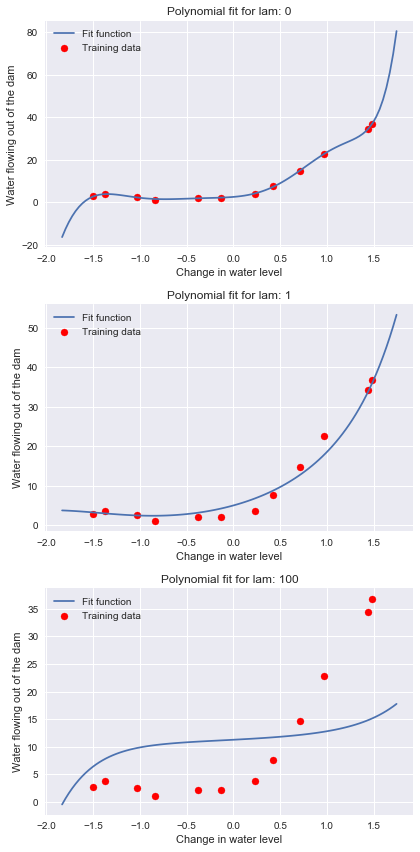

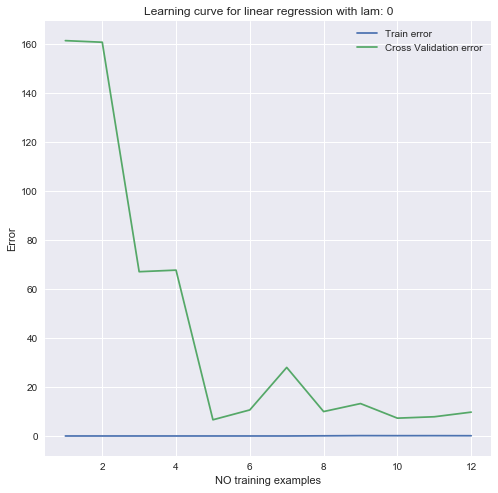

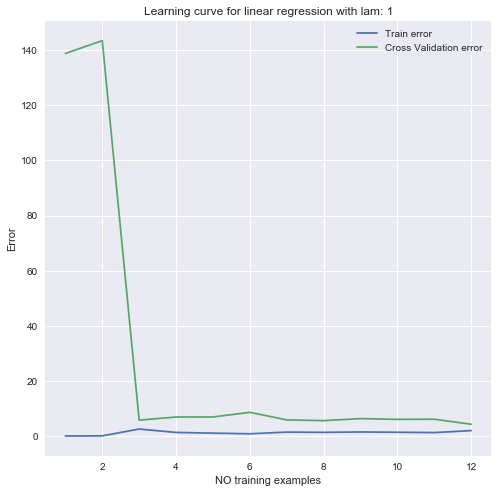

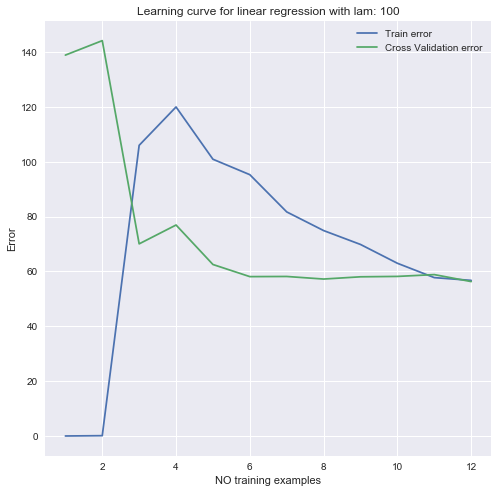

In [16]:
sdsc = StandardScaler()
polynomial = 8

pr = polynomial_regression(Xtrain, ytrain, Xval, yval, sdsc, polynomial)
x_min = Xtrain['x'].min()
x_max = Xtrain['x'].max()

fun_range = [1.2 * x_min,  1.2 * x_max]
precision = 100
lambdas = [0, 1, 100]
split_size = 1

rows_count = len(lambdas)
fig, axes = plt.subplots(nrows=rows_count, figsize=[2*rows_count,4*rows_count])

for ind, lam in enumerate(lambdas):
    print('Calculating for lambda: ', lam)
    ax = axes[ind]
    pr.draw_polynomial_fit(fun_range, precision, ax, lam)
    pr.draw_polynomial_learning_curve(split_size, lam)
fig.tight_layout()

([<matplotlib.axis.XTick at 0x27a3137dcf8>,
 <a list of 10 Text xticklabel objects>)

[0    0.028891
 dtype: float64, 0    0.10798
 dtype: float64, 0    0.166794
 dtype: float64, 0    0.217952
 dtype: float64, 0    0.27515
 dtype: float64, 0    0.438658
 dtype: float64, 0    0.868168
 dtype: float64, 0    1.958691
 dtype: float64, 0    4.525107
 dtype: float64, 0    14.825777
 dtype: float64]

[0    54.092043
 dtype: float64, 0    9.35818
 dtype: float64, 0    15.921624
 dtype: float64, 0    17.14891
 dtype: float64, 0    13.215422
 dtype: float64, 0    7.926386
 dtype: float64, 0    4.760823
 dtype: float64, 0    4.263356
 dtype: float64, 0    3.832177
 dtype: float64, 0    8.889695
 dtype: float64]

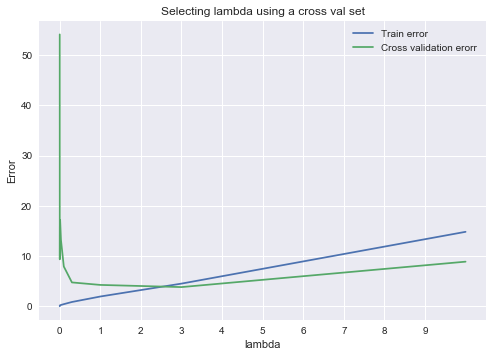

In [17]:
def get_train_and_val_errors(pr, lambdas):
    train_errors = []
    val_errors = []
    for lam in lambdas:
        theta = pr.minimize(lam)
        train_errors.append(calculate_error(pr.Xtrain, pr.ytrain, theta))
        val_errors.append(calculate_error(pr.Xval, pr.yval, theta))
    return train_errors, val_errors

sdsc = StandardScaler()
polynomial = 8

pr = polynomial_regression(Xtrain, ytrain, Xval, yval, sdsc, polynomial)

fun_range = [-70, 60]
precision = 100
lambdas = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
split_size = 1

train_errors, val_errors = get_train_and_val_errors(pr, lambdas)

plt.plot(lambdas, train_errors)
plt.plot(lambdas, val_errors)
plt.xticks(range(0, 10, 1))
plt.title('Selecting lambda using a cross val set')
plt.xlabel('lambda')
plt.ylabel('Error')
plt.legend(['Train error', 'Cross validation erorr'])

train_errors
val_errors

In [18]:
lam = 3

pr = polynomial_regression(Xtrain, ytrain, Xval, yval, sdsc, polynomial)
theta = pr.minimize(lam)

Xtest_stdandarized = pr.calculate_standarized_value(Xtest)
calculate_error(Xtest_stdandarized, ytest, theta)

0    3.572027
dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

def plot_learning_curves_with_randomly_selected_samples(Xtrain, ytrain, Xval, yval, repetitions, lam):
    train_errors = dict()
    val_errors = dict()
    for r in range(0, repetitions):
        if r % 5 == 0:
            print(f'Repetition {r} in progress...')
        for no_training_samples in range(11, 100, 11):
            no_training_samples = no_training_samples / 100
            
            _, xtr, _, ytr =  train_test_split(Xtrain, ytrain, test_size=no_training_samples)
            _, xv, _, yv = train_test_split(Xval, yval, test_size=no_training_samples)
            
            pr = polynomial_regression(xtr, ytr, xv, yv, sdsc, polynomial)
            theta = pr.minimize(lam)
            
            train_errors.setdefault(no_training_samples, []).append(calculate_error(pr.Xtrain, pr.ytrain, theta)) 
            val_errors.setdefault(no_training_samples, []).append(calculate_error(pr.Xval, pr.yval, theta))
    print('Calculations ended.')
    return train_errors, val_errors

sdsc = StandardScaler()
polynomial = 8
fun_range = [-70, 60]
precision = 100
lam = .01
repetitions = 50

train_errors, val_errors = plot_learning_curves_with_randomly_selected_samples(Xtrain, ytrain, Xval, yval, repetitions, lam)


Repetition 0 in progress...
Repetition 5 in progress...
Repetition 10 in progress...
Repetition 15 in progress...
Repetition 20 in progress...
Repetition 25 in progress...
Repetition 30 in progress...
Repetition 35 in progress...
Repetition 40 in progress...
Repetition 45 in progress...
Calculations ended.


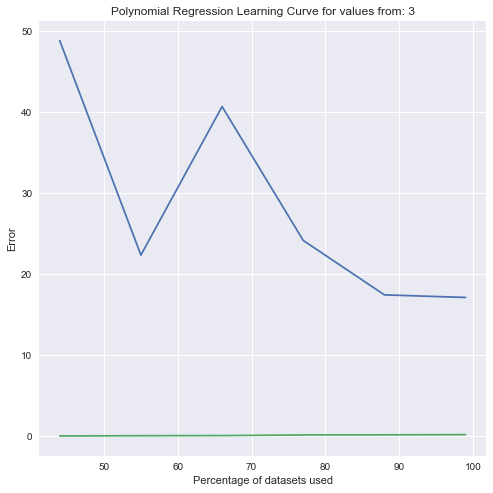

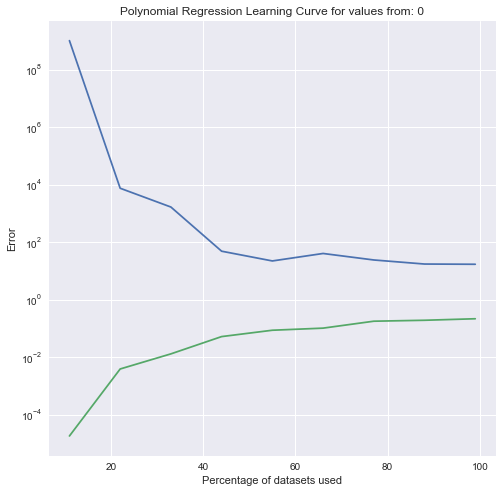

In [22]:
def plot_last_n(n=0, scale='linear'):
    fig, axes = plt.subplots(figsize=[8,8])
    axes.plot(list(val_df.columns[n:] * 100), val_df.mean().values[n:])
    axes.plot(list(val_df.columns[n:] * 100), train_df.mean().values[n:])
    title = 'Polynomial Regression Learning Curve for values from: ' + str(n)
    plt.title(title)
    plt.xlabel('Percentage of datasets used')
    plt.ylabel('Error')
    plt.yscale(scale)
    
val_df = pd.DataFrame(val_errors)
train_df = pd.DataFrame(train_errors)
plot_last_n(3)
plot_last_n(0, 'log')

In [23]:
print(f'Differences in given plots come from different minimize function, randomization in choosing data subset and fact that choosing data subset is defined by list: {val_df.columns.values}')

Differences in given plots come from different minimize function, randomization in choosing data subset and fact that choosing data subset is defined by list: [ 0.11  0.22  0.33  0.44  0.55  0.66  0.77  0.88  0.99]
